In [1]:
# File paths
all_athletes_file = 'data/ALL-ATHLETES.csv'
movies_file = 'data/movies.csv'

                                               PART ONE

1. What is the difference between SparkContext and SparkSession?

Answer: 
    
Spark Context: In older version of Spark() before 2.0,  there were different contexts that were entry-points to the different data.  In order to use APIs of SQL, HIVE, and Streaming, separate contexts need to be created.

Spark Sessions: Spark Session was introduced in Version in 2.0. SparkSession is a single-unified entry point to manipulate data with Spark. All the functionality available with sparkContext are also available in sparkSession. In order to use APIs of SQL, HIVE, and Streaming, no need to create separate contexts as sparkSession includes all the APIs.


2. Explain the shuffle operation in Spark operations. Give an example.

Answer: 

Shuffle operation in Spark is relocating the data across multiple partitions. It occurs when transformations like groupby() is used on RDD. It is a complex operation.

e.g. We have a dataset of surgeries performed in multiple hospitals. If we want to get information on surgeries performed per hospital, we need to use groupby operation on that data. It's simple operation if the data is store in just one partition (meaning there aren't any partitions). If the data is stored in multiple partitions then the data needs to be re-partitioned in such a way that all the surgeries for each hospital will be stored at one partition. This is a shuffle operation.


3. What is the difference between a Spark transformation and a Spark action.

Answer:

Spark transformation is a function that creates a new dataset(RDD) everytime it is applied to an existing dataset. They are lazy, i.e. they are only called when needed by an action.
e.g. map(), filter(), sample(), union(), distinct(), groupByKey(), repartition()

Spark actions is a function that is performed on an existing RDD and it returns non dataset values. The result of an action is stored to drivers.
e.g. reduce(), collect(), count(), first(), take()


4. Cleaning Data

a. What operations do we have on Panda DataFrames to deal with missing values?

Answer: 

Pandas provides isna(), notna(), isnull(), notnull() functions to detect the missing data. Missing data is can easily be replaced with valid values. Panda provides functions such as fillna() which replaces the missing value with value in the previous or next row. The fillna() function can also be used to replace missing values with mean/median of the data. Pandas also provides dropna() function which is used to drop either rows or columns with na values.

b. What are some of the problems that occur in dealing with missing values in Panda DataFrames?

Answer: 

The most common problem with dealing with missing data is choosing the solution to resolve missing data. There are multiple ways to handle missing data as I mentioned above. Whether to delete the entire record containing missing data or filling it with valid values is a critical decision.
The another problem is understanding the source of the missing data, whether the missing data was a programmatic error, was it lost during transfer or was it intentionally left blank because it's supposed to be like that. The manipulation on missing data can be done based on the source.
Also we need to check the data type of the missing data. If the missing data is not obvious we need to have a check for that. e.g sometimes user who fills out the data tends to enter values such as '--' for missing data.

c. What operations do we have on Spark DataFrames to deal with missing values.

Answer:

Spark provides functions such as fillna() which replaces the missing value with value in the previous or next row. The fillna() function can also be used to replace missing values with mean/median of the data. Spark also provides dropna() function which is used to drop rows with na values.


5. What is a categorical variable? Give an example.

Answer :

Categorical variables are predefined set of label values. These are common in many Data Science and Machine Learning problems. Often they are non-numerical values. Machine learning algorithms require that their input is numerical and therefore categorical features must be transformed into numerical features before we can use any of these algorithms. 
E.g, For estimating housing prices project a categorical variable will be ocean proximity.
Beach Front,
Ocean Front,
Near bay,
Inland,
Island


6. What are hyperparameters? Give an example.

Answer:

In Machine learning, model parameters are learned through training the model (by fitting data to the model).
Whereas as the hyperparameters cannot be directly learned thought training the model. The hyperparameters are set before training the model. These can be defined as configuration of the model. Hyperparameters can be decided by setting different values ad selecting the best value based on the result. 
E.g. Number of clusters in a k-means clustering is an example of hyperparameter.


In [2]:
import pandas as pd
import pandas.core.groupby as df_group_by
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import sem, t
from scipy import mean


                                    PART TWO
This part uses the athlete data set in the file ALL-ATHLETES.csv. This dataset contains information about athletes that participated in the London 2012 Olympics.


1. The data requires some cleaning. Make sure that you clean the data before working on the rest of the problems. All solutions should start with the original dataset.

In [3]:
try:
    all_athletes_df = pd.read_csv(all_athletes_file, error_bad_lines = False, warn_bad_lines=False)
except Exception as e:
    print("Error in File : "+ all_athletes_file)
    print(e)
    
all_athletes_df.head()
all_athletes_df[all_athletes_df['Height, cm'].isnull()].head()
all_athletes_df[all_athletes_df['Weight'].isnull()].head()
all_athletes_df[all_athletes_df['Weight'].isnull()].head()

all_athletes_df.dropna(subset=['Height, cm','Weight', 'Sex', 'Age', 'Total'], inplace = True)

all_athletes_df.head()


,Name,Country,Age,"Height, cm",Weight,Sex,Date of birth,Place of birth,Gold,Silver,Bronze,Total,Sport,Event
0,Lamusi A,People's Republic of China,23,170.0,60.0,M,6/2/1989,NEIMONGGOL (CHN),0,0,0,0,Judo,Men's -60kg
1,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Sheldon (USA),0,0,0,0,Athletics,Men's Hammer Throw
2,Jamale Aarrass,France,30,187.0,76.0,M,11/15/1981,BEZONS (FRA),0,0,0,0,Athletics,Men's 1500m
4,Maria Abakumova,Russian Federation,26,178.0,85.0,F,1/15/1986,STAVROPOL REGION (RUS),0,0,0,0,Athletics,Women's Javelin Throw
5,Luc Abalo,France,27,182.0,80.0,M,9/6/1984,NaN,0,0,0,0,Handball,Men's Handball


2. Produce a scatter plot of the athletes weight verses height.

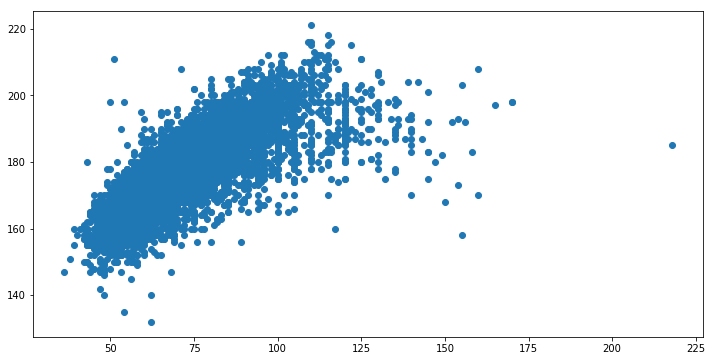

In [4]:
figure = plt.figure(figsize=(12, 6)) #(width, height)

plt.scatter(all_athletes_df['Weight'], all_athletes_df['Height, cm'])

3. Produce box plots of the following. How do the weights compare?
a. Female weights
b. Male weights
c. Weight of the male metal winners 
d. Weight of the female metal winners

Text(0.5, 0, '')

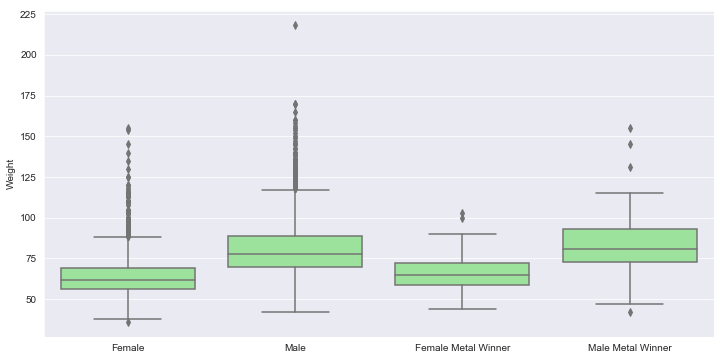

In [5]:
female = all_athletes_df.query("Sex == 'F'")[['Weight','Age']]
female['Category'] = 'Female'       

male = all_athletes_df.query("Sex == 'M'")[['Weight','Age']]
male['Category'] = 'Male' 

female_metal_winner = all_athletes_df.query("Sex == 'F' & Total > 0")[['Weight','Age']]
female_metal_winner['Category'] = 'Female Metal Winner'   

male_metal_winner = all_athletes_df.query("Sex == 'M' & Total > 0")[['Weight','Age']]
male_metal_winner['Category'] = 'Male Metal Winner'  

combined_weight_categories = pd.concat([
    female, male, female_metal_winner, male_metal_winner
],ignore_index=True)

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.boxplot(x="Category", y="Weight", data=combined_weight_categories, color='lightgreen') 
ax = plt.gca()
ax.set_xlabel('')


Analysis: 
    
Comparing the weights of males vs males metal winners and females vs female metal winners, we clearly see that there are a lot of outliers as the weight increases in all male and female participants, but in metal winner plot there are only a couple of outliers. Hence we can assume that very few participant with higher weight have won metals.

The median weight of male is higher than that of female in both metal winners and all the participants. 



4. Produce separate swarm plots of the ages of male metal winners and the female metal winners. How do the ages compare?

Text(0.5, 0, '')

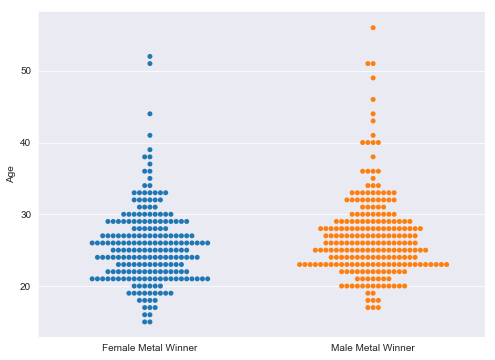

In [6]:
combined_metal_winners = pd.concat([
    female_metal_winner, male_metal_winner
],ignore_index=True)
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
ax = sns.swarmplot(x="Category", y="Age", data=combined_metal_winners)
ax.set_xlabel('')

Analysis : 

The graph shows that the females of aproximately ages between 13 to 53 have won the metals. Whereas the male metal winner lie between ages 15 to 57. In younger age there are fewer metals won by both male and females. It indicates that there are fewer sports to participate in for younger player. As the age goes up the number of metals increase. For females ages beween 20 to 29, the number of metals won is higher. Whereas for male metals winners the number is higher between ages 23 to 28. After age 30 the number of metals won seems to have declined for both Females and males. After 40 the number of medals won is in single digits. It indicates that the number of sports for that age category are fewer. 

5. Produce separate violin plots for the ages of the athletes in Archery, Sailing, and Swimming. How do the ages compare?

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, '')

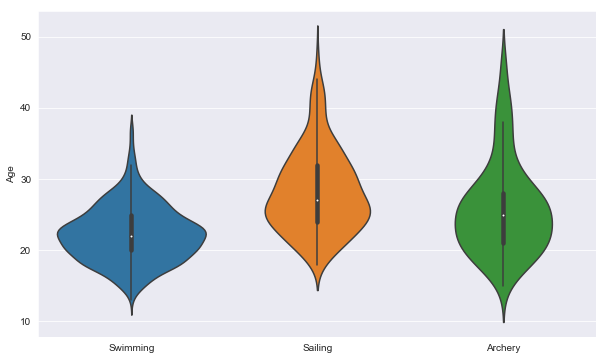

In [7]:
all_athletes_sub_set_df = all_athletes_df.query("Sport == 'Archery' | Sport == 'Sailing' | Sport == 'Swimming'")
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
ax = sns.violinplot(x='Sport', y='Age', data=all_athletes_sub_set_df)
ax.set_xlabel('')

Analysis : 

The graph shows that for Swimming and Archery the players start participating from very young age as young as 10 years old. Whereas For Sailing the players start from age 15. As the age goes up the number of participants have increased for all the three sports. The number of athletes are highest for swimming at age around 22. It looks the same for Archery. Whereas for Sailing the number of participents is highest at the age of 25-26. The number seems to decline after this age for all the three sports. 
There aren't any athelets for swimming after age 40. But for sailing and archery there are athletes above age 40 participating, althought the number seem to have declined. The number of years athletes can participate in swimming is less than that of sailing and archery.
For both Sailing and Archery there aren't any atheletes over age 52-53.

6. Produce a histogram of the metals won per country, sorted by the number of metals won.

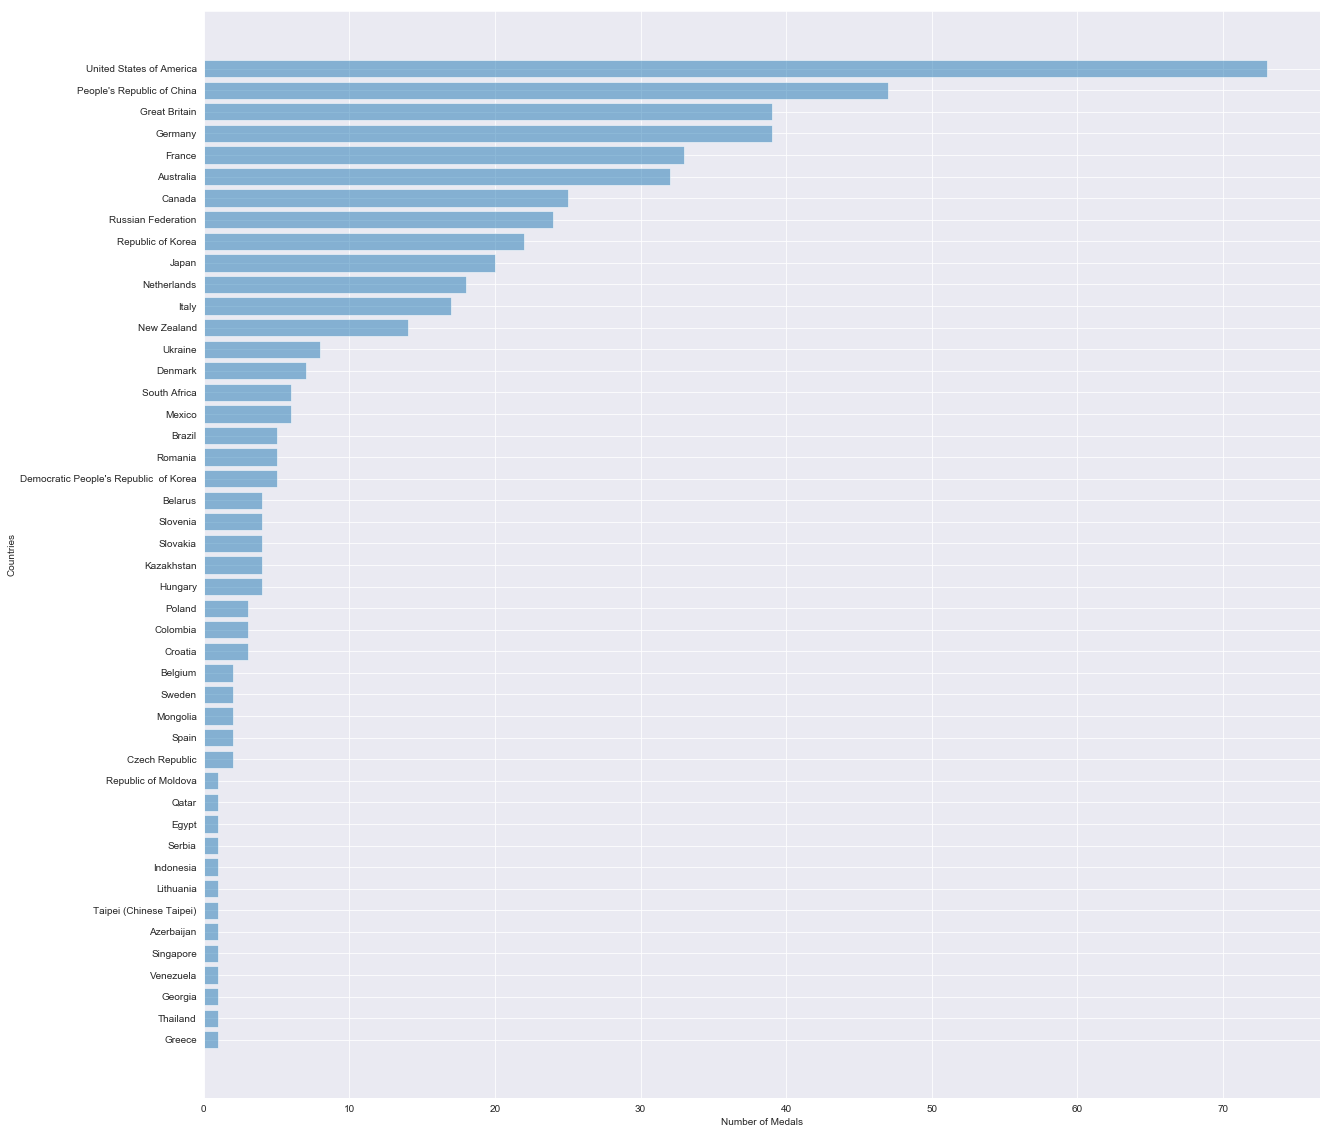

In [8]:
country_medals_df = all_athletes_df.groupby(['Country'])[["Total"]].sum().reset_index()
country_medals_df.sort_values(by=['Total'], inplace = True)
country_medals_df.drop(country_medals_df[country_medals_df.Total == 0].index, inplace=True)
plt.figure(figsize=(20,20))
plt.barh(country_medals_df['Country'], country_medals_df['Total'], align='center', alpha=0.5)
plt.xlabel('Number of Medals')
plt.ylabel('Countries')
plt.show()

Text(0, 0.5, 'Frequency')

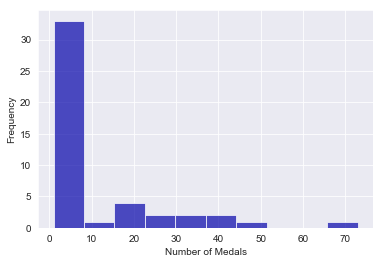

In [9]:
plt.hist(country_medals_df['Total'], bins=10, color='#0504aa',
                            alpha=0.7)
plt.xlabel('Number of Medals')
plt.ylabel('Frequency')

                                            Part Three 60 points

This part uses the movie dataset in the movies.csv file. The data set classifies the
movies as either a romance or an action movie. The columns other than "Title", "Genre", "Year", "Rating", "# Votes" and "# Words" in the file are all words that appear in some of the movies in our dataset. The words are stemmed. The column for a word shows the percentage of the total words in the movie were that particular word. So for example the word “the” was 0.043807463 percent of the words that were spoken in the movie “The Terminator”.

1. Using scikit-learn split the movie data into a training and test set. Create three different models from the training set to classify movies as action or romance using K- means, DBSCAN and GaussianNB.

In [10]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn import preprocessing

import time



In [11]:
try:
    movies_df = pd.read_csv(movies_file, error_bad_lines = False, warn_bad_lines=False)
except Exception as e:
    print("Error in File : "+ movies_file)
    print(e)
    
movies_df.head()


,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [12]:
movies_df_cleaned = movies_df.drop(['Title', 'Genre', 'Year', 'Rating', '# Votes', '# Words'], axis=1)
movies_df_cleaned = movies_df_cleaned.dropna(axis = 1, how = 'any')
movies_df_cleaned = movies_df_cleaned._get_numeric_data()

y = movies_df['Genre']

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(movies_df_cleaned, y, test_size=0.2, random_state=2)

kmeans_model = KMeans(n_clusters=2, random_state=2, init = 'k-means++')
kmeans_model.fit(X_train)

gaussinal_NB_model = GaussianNB() 
gaussinal_NB_model.fit(X_train, y_train);

lable_encoder = preprocessing.LabelEncoder()
lable_encoder.fit(y_test)


LabelEncoder()

<function matplotlib.pyplot.show(*args, **kw)>

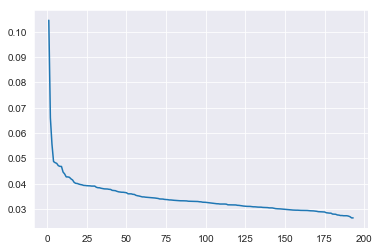

In [13]:
# Use nearest neighbors to calculate eps value for DBScan model
ns = 6
nbrs = neighbors.NearestNeighbors(n_neighbors=len(X_train)).fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
distance_sort = sorted(distances[:,ns-1], reverse = True)
plt.plot(list(range(1, len(indices)+1)), distance_sort)
plt.show


In [14]:
dbscan_model = DBSCAN(eps=0.05, min_samples=6)
y_predict_dbscan = dbscan_model.fit_predict(X_train)

print("--- Execution time to fit the models %s seconds ---" % (time.time() - start_time))

--- Execution time to fit the models 1.4280381202697754 seconds ---


2. Compare the performance of the three classifiers using accuracy score and confusion matrix. Which classifier is better? Why?

In [15]:
def accuracy_score(model, labels_true, labels_predict):
    print('Accuracy for Model '+model)
    score = metrics.accuracy_score(labels_true, labels_predict)
    print('{0:f}'.format(score))
    print()

def plot_confusion_matrix(model, labels_true, labels_predict, label_train):
    print('Confusion matrix for Model '+model)
    error_matrix = metrics.confusion_matrix(labels_true, labels_predict)
    sns.heatmap(error_matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(label_train), yticklabels=np.unique(label_train)) 
    plt.xlabel('true label') 
    plt.ylabel('predicted label')
    plt.show()
    print()


Accuracy for Model GaussianNB
0.693878

Confusion matrix for Model GaussianNB


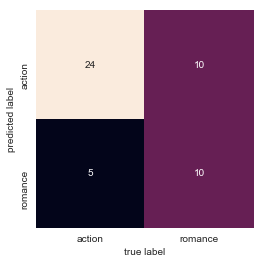

In [16]:
#Accuracy Score for Gaussian NB
y_pred_gaussian_NB = gaussinal_NB_model.predict(X_test)
accuracy_score("GaussianNB", y_test, y_pred_gaussian_NB)
plot_confusion_matrix("GaussianNB", y_test, y_pred_gaussian_NB, y_train)

Accuracy for Model K-means
0.693878

Confusion matrix for Model K-means


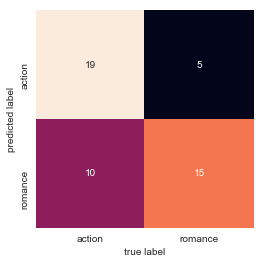

In [17]:
#Accuracy Score for K-means
y_predict_kmeans = kmeans_model.predict(X_test)
y_test_encoded = lable_encoder.transform(y_test);
accuracy_score("K-means", y_test_encoded, y_predict_kmeans)
plot_confusion_matrix("K-means", y_test_encoded, y_predict_kmeans, y_train)

Accuracy for Model DBScan
0.538860

Confusion matrix for Model DBScan


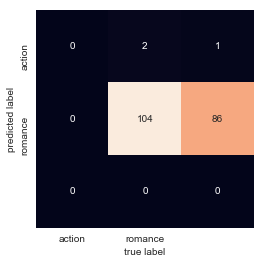

In [18]:
#Accuracy Score for DBScan
y_train_encoded = lable_encoder.transform(y_train);
accuracy_score("DBScan", y_train_encoded, y_predict_dbscan)
plot_confusion_matrix("DBScan", y_train_encoded, y_predict_dbscan, y_train)

Comparison of performance of three models:

1. GaussianNB: The accuracy score for GaussianNB is consistantly higher. As it's a supervised machine learning model, the predicted labels match with training labels. Hence any conversion of the predicted labels isn't needed. By looking at the confusion matrix for GaussianNB, it can be concluded that the classification of most of the data is accurate.

2. K-Means: The accuracy score for K-Means is consistantly higher too.  As it's a unsupervised machine learning model, the predicted labels are in numeric format. Hence to check the accuracy of the predicted labels, the test labels need to be encoded. By looking at the confusion matrix for K-Means, it can be concluded that the classification of most of the data is accurate.

3. DBScan: The accuracy score for DBScan model is consistantly low. Similar to K-means this model is also unsupervised learning model. Hence the train data encoding is required for calculating the accuracy score. Also as we cannot set the number of clusters before fitting the model, the number of predicted labels is not consistant with the test labels as seen in the confusion matrix.

In conclusion, as the we already have labels for the data, the better approach to choose classification model is going to supervised learning model. Hence, even though accuracy score for K-Means is high, the GaussianNB classification model is better model in this case.

3. Compare two cluster results using Adjusted Rand index, Homogeneity, completeness and V-measure and Silhouette Coefficient.

In [19]:

def cluster_scores(model_name, labels_true, labels_predict, X_test_data):
    print("Scores for Model "+model_name)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_predict))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_predict))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_predict))
    print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels_predict))
    print("Silhouette Coefficient: ")
    try:
        print("%0.3f"
          % metrics.silhouette_score(X_test_data, labels_predict))
    except ValueError as e:
        print (e)
    print()
 

In [20]:
#Scores for K-means model
cluster_scores("K-Means", y_test, y_predict_kmeans, X_test)

#Scores for DBSCAN model
cluster_scores("DBSCAN", y_train, y_predict_dbscan, X_train)


Scores for Model K-Means
Homogeneity: 0.122
Completeness: 0.119
V-measure: 0.120
Adjusted Rand Index: 0.133
Silhouette Coefficient: 
0.059

Scores for Model DBSCAN
Homogeneity: 0.001
Completeness: 0.006
V-measure: 0.001
Adjusted Rand Index: -0.002
Silhouette Coefficient: 
0.465



Homogeneity, Completeness, V-measure, Adjusted Rand Index score are used to verify accuracy of the predicted labels against the test labels. As it's clear all these score are low for both the clusters. 

The Homogeneity score of k-mean is higher than that of DBSCAN, we can assume that number of clusters that have member of the same class is higher in K-means model as compared to DBScan model.
Same with Completeness score of k-means, we can assume that number of members of a given class that are assigned to the same cluster is higher in K-means as compared to DBScan. V-measure is mean of both the scores. 

Adjusted Rand Index  indicates that the similarity between two clusters is higher in K-Means as compared to DBScan.
The Silhouette Coefficient indicates that the consistancy within the clusters of data is higher in DBScan.


4. The movie dataset has a lot of features. Use PCA to reduce the dataset to 30 independent variables. Repeat 1-3 on the reduced dataset.
a. How do the result compare using the reduced dataset
b. How much of the variation of the original dataset is in the new 30 dimensions.


In [21]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(movies_df_cleaned)

start_time = time.time()
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=2)

kmeans_model_pca = KMeans(n_clusters=2, random_state=2, init = 'k-means++')
kmeans_model_pca.fit(X_train_pca)

gaussinal_NB_model_pca = GaussianNB() 
gaussinal_NB_model_pca.fit(X_train_pca, y_train_pca);

<function matplotlib.pyplot.show(*args, **kw)>

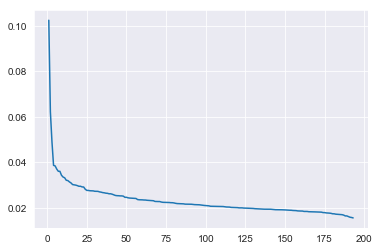

In [22]:
# Use nearest neighbors to calculate eps value for DBScan model
ns = 6
nbrs = neighbors.NearestNeighbors(n_neighbors=len(X_train_pca)).fit(X_train_pca)
distances, indices = nbrs.kneighbors(X_train_pca)
distance_sort = sorted(distances[:,ns-1], reverse = True)
plt.plot(list(range(1, len(indices)+1)), distance_sort)
plt.show

In [23]:
dbscan_model_pca = DBSCAN(eps=0.04, min_samples=6)
y_predict_dbscan_pca = dbscan_model_pca.fit_predict(X_train_pca)
print("--- Execution time to fit the models %s seconds ---" % (time.time() - start_time))

--- Execution time to fit the models 0.3004150390625 seconds ---


Accuracy for Model GaussianNB
0.653061

Confusion matrix for Model GaussianNB


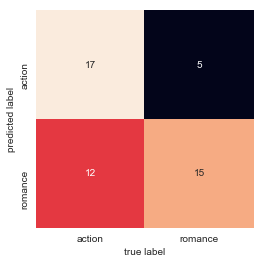

In [24]:
#Accuracy score and confusion matrix for GaussianNB model for reduced dataset
y_pred_gaussian_NB_pca = gaussinal_NB_model_pca.predict(X_test_pca)
accuracy_score("GaussianNB", y_test_pca, y_pred_gaussian_NB_pca)
plot_confusion_matrix("GaussianNB", y_test_pca, y_pred_gaussian_NB_pca, y_train_pca)

Accuracy for Model K-means
0.693878

Confusion matrix for Model K-means


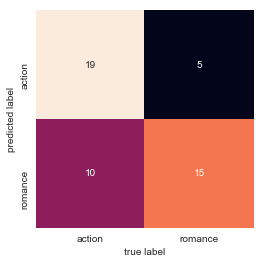

In [25]:
#Accuracy Score for K-means
y_predict_kmeans_pca = kmeans_model_pca.predict(X_test_pca)
y_test_pca_encoded = lable_encoder.transform(y_test_pca);
accuracy_score("K-means", y_test_pca_encoded, y_predict_kmeans_pca)
plot_confusion_matrix("K-means", y_test_pca_encoded, y_predict_kmeans_pca, y_train_pca)

Accuracy for Model DBScan
0.538860

Confusion matrix for Model DBScan


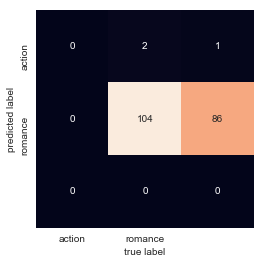

In [26]:
#Accuracy Score for DBScan
y_train_pca_encoded = lable_encoder.transform(y_train_pca);
accuracy_score("DBScan", y_train_pca_encoded, y_predict_dbscan_pca)
plot_confusion_matrix("DBScan", y_train_pca_encoded, y_predict_dbscan_pca, y_train_pca)

In [27]:
#Scores for K-means model for reduced dataset
cluster_scores("K-Means", y_test_pca, y_predict_kmeans_pca, X_test_pca)

#Scores for DBSCAN model for reduced dataset
cluster_scores("DBScan", y_train_pca, y_predict_dbscan_pca, X_train_pca)

Scores for Model K-Means
Homogeneity: 0.122
Completeness: 0.119
V-measure: 0.120
Adjusted Rand Index: 0.133
Silhouette Coefficient: 
0.088

Scores for Model DBScan
Homogeneity: 0.001
Completeness: 0.006
V-measure: 0.001
Adjusted Rand Index: -0.002
Silhouette Coefficient: 
0.556



a. How do the result compare using the reduced dataset.

Most of the accuracy scores are lower for the models using reduced dataset. There isn't a drastic change in the scores. Although the execution time is less for fitting reduced data as compare to the execution time for fitting entire dataset.

The comparison between the given models based on their respective accuracy score, and confusion matrix is similar as explained for the entire data.

Also the comparison between clusters based on their Homogeneity, Completeness, V-measure, Adjusted Rand Index, Silhouette Coefficient is similar as explained above.

b. How much of the variation of the original dataset is in the new 30 dimensions.

In [28]:
print("The variation of the Original dataset in the new 30 dimensions")
print(pca.explained_variance_)


The variation of the Original dataset in the new 30 dimensions
[1.93997860e-04 9.07511446e-05 6.51803808e-05 5.40354323e-05
 4.50622388e-05 3.63641844e-05 3.57944742e-05 2.99537144e-05
 2.80012939e-05 2.47785358e-05 2.24688592e-05 2.05478983e-05
 2.03008928e-05 1.85391310e-05 1.65346114e-05 1.45591600e-05
 1.29992177e-05 1.25751101e-05 1.20891789e-05 1.08282664e-05
 1.02139594e-05 9.60818302e-06 9.45710467e-06 9.26814946e-06
 8.75898101e-06 8.53290710e-06 8.31386269e-06 7.35086400e-06
 6.95660090e-06 6.74987894e-06]
